In [1]:
import numpy as np
from scipy import stats
import seaborn as sns

dado os pontos $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$, para "fittá-los" em um modelo linear:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

- $\hat{y}$ é o valor previsto a partir da modelagem de: $y$, $\beta_0$, $\beta_1$.
- $\beta_0$ é a interceptação (intercept) da curva com o eixo y e $\beta_1$ é o coeficiente angular 

## Primeiro passo: definimos o resíduo da curva

para cada ponto $(x_i, y_i)$, o resíduo (ou erro) é a diferença observada entre $y_i$ e $\hat{y}_i$, onde "y chapéu" é $\hat{y}_i = \beta_0 + \beta_1 x_i$:

$$
\text{Erro ou Resíduo} = y_i - \hat{y}_i = y_i - (\beta_0 + \beta_1 x_i)
$$

Em uma regressão linear, temos como meta minimizar esses resíduos dado um valor para ($\beta_0$, $\beta_1$):

$$
S(\beta_0, \beta_1) = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2
$$

Para o caso que queremos de alguma maneira influenciar no cálculo do erro ($\beta_0$, $\beta_1$), esse é o momento de fazer modificações, já que essa é a equação que iremos derivar e isolar e encontrar $\beta_0$ e $\beta_1$.

Para adicionar os erros, vamos adicionar (somente na parte direita da equação) o valor $1/\sigma_i^2$, onde é algum erro externo que identificamos para cada valor de $y_i$:

$$
S(\beta_0, \beta_1) = \sum_{i=1}^{n} \left(\frac{y_i - (\beta_0 + \beta_1 x_i)}{\sigma_i}\right)^2
$$

notando que, nesse step podemos fazer **qualquer** modificação para ter outros valores de $\beta_0$ e $\beta_1$, por exemplo:

A regressão de Lasso:

$$
S(\beta_0, \beta_1) = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2 + \lambda \sum_{i=1}^{n} |\beta_i|
$$

dessa maneira, penalizamos caso o valor de $\beta_0$ e $\beta_1$ caso sejam muito grandes, entre outras diversas formas de fazer reg. lineares


## Step 2: Minimizando (derivando) S:

Para encontrar os valores que melhor se adequam aos nossos dados, fazemos as derivadas parciais de S por $\beta_0$ e $\beta_1$ e igualamos a zero

### Derivada parcial de $\beta_0$:

$$
\frac{\partial S}{\partial \beta_0} = -2 \sum_{i=1}^{n} \frac{1}{\sigma_i^2} (y_i - \beta_0 - \beta_1 x_i) = 0
$$

simplificando:

$$
\sum_{i=1}^{n} \frac{y_i}{\sigma_i^2} = \beta_0 \sum_{i=1}^{n} \frac{1}{\sigma_i^2} + \beta_1 \sum_{i=1}^{n} \frac{x_i}{\sigma_i^2} 
$$

### Derivada parcial de $\beta_1$:

$$
\frac{\partial S}{\partial \beta_1} = -2 \sum_{i=1}^{n} \frac{x_i}{\sigma_i^2} (y_i - \beta_0 - \beta_1 x_i) = 0
$$

simplificando:

$$
\sum_{i=1}^{n} \frac{x_i y_i}{\sigma_i^2} = \beta_0 \sum_{i=1}^{n} \frac{x_i}{\sigma_i^2} + \beta_1 \sum_{i=1}^{n} \frac{x_i^2}{\sigma_i^2}
$$

## Resolvendo para $\beta_0$ e $\beta_1$

Definimos as seguintes variáveis para melhor visualizar as equações definidas acima:

$$
S = \sum_{i=1}^{n} \frac{1}{\sigma_i^2}, \quad
S_x = \sum_{i=1}^{n} \frac{x_i}{\sigma_i^2}, \quad
S_y = \sum_{i=1}^{n} \frac{y_i}{\sigma_i^2}, \quad
S_{xx} = \sum_{i=1}^{n} \frac{x_i^2}{\sigma_i^2}, \quad
S_{xy} = \sum_{i=1}^{n} \frac{x_i y_i}{\sigma_i^2}
$$

Assim temos:

$$
S_y = \beta_0 S + \beta_1 S_x
$$

$$
S_{xy} = \beta_0 S_x + \beta_1 S_{xx}
$$

Resolvendo esse sistema de equações, encontramos os betas:

$$
\beta_1 = \frac{S S_{xy} - S_x S_y}{S S_{xx} - S_x^2}
$$

$$
\beta_0 = \frac{S_{xx} S_y - S_x S_{xy}}{S S_{xx} - S_x^2}
$$

## Equação final

E a expressão final:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

Onde $\beta_0$ e $\beta_1$ foram definidos acima. Caso o erro seja maior para um ponto específico, ele terá menos impacto no valor final dos nossos betas.

Observando utilizando bibliotecas de python:

In [12]:
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
y = np.array([1.2, 2.1, 3.3, 3.8, 5.2])
y_err = np.array([0.2, 0.15, 0.3, 0.25, 0.1])  

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

weights = 1.0 / y_err**2  
w_slope, w_intercept = np.polyfit(x, y, 1, w=weights)


<Axes: >

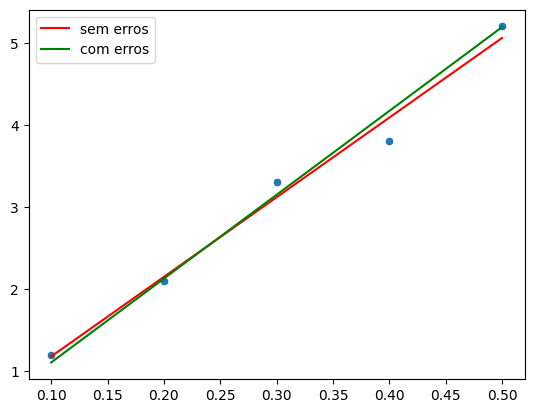

In [15]:
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=intercept + slope*x, color='red', label="sem erros")
sns.lineplot(x=x, y=w_intercept + w_slope*x, color='green', label="com erros")

In [4]:
N_Total = 2567
N_background = 1223.5
L = 25  # fb^-1
syst_unc_L = 0.10  

In [17]:
sigma = (N_Total - N_background) / L

# erro statistico
stat_unc_sigma = np.sqrt(N_Total) + np.sqrt(N_background)

# error systematico
syst_unc_sigma = sigma * syst_unc_L

# Print results
print(" (σ):", sigma, "fb")
print("erro estatistico:", stat_unc_sigma, "fb")
print("erro sistematico:", syst_unc_sigma, "fb")
print(f"valor: {sigma} +- {stat_unc_sigma} +- {syst_unc_sigma}")

 (σ): 53.74 fb
erro estatistico: 85.64413502835902 fb
erro sistematico: 5.3740000000000006 fb
valor: 53.74 +- 85.64413502835902 +- 5.3740000000000006
